In [24]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

from sklearn import preprocessing

import utils_notebook
import utils_train

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train_data = pd.read_csv(os.path.join('..', 'data', 'training.csv'))
train_data.tail()

,price,rrp_price,discount,store_region,store_open,store_visitors,customer_age,customer_gender,staff_sales,staff_experience,staff_age,in_store_promotions,sales
4995,447.31,44731.0,0.000000,north,1,993.413094,50.0,female,0,3,33.0,NaN,0
4996,463.84,46384.0,0.423968,east,1,918.292221,58.0,male,1,22,44.0,1.0,1
4997,419.91,41991.0,0.593226,north,1,960.139885,NaN,NaN,1,8,43.0,NaN,1
4998,468.79,46879.0,0.201646,north,1,976.294908,NaN,female,0,6,37.0,NaN,0
4999,472.91,47291.0,0.000000,west,1,908.478967,59.0,female,0,22,43.0,NaN,0


In [3]:
utils_notebook.missing_values_table(train_data)

Your selected dataframe has 13 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
in_store_promotions,3250,65.0
customer_gender,150,3.0
customer_age,100,2.0
discount,75,1.5
store_visitors,50,1.0


## Exploratory Data Analysis

In [4]:
train_data.describe(include="all").T.sort_values("top")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_gender,4850,2,male,2455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_region,5000,4,south,1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,5000.0,NaN,NaN,NaN,498.749036,49.350699,329.63,465.28,498.67,532.4125,677.35
rrp_price,5000.0,NaN,NaN,NaN,49874.9036,4935.06995,32963.0,46528.0,49867.0,53241.25,67735.0
discount,4925.0,NaN,NaN,NaN,0.203342,0.166276,0.0,0.0,0.189486,0.314678,0.698328
store_open,5000.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
store_visitors,4950.0,NaN,NaN,NaN,950.590215,28.943001,900.016059,925.035829,950.599065,975.493105,999.986489
customer_age,4900.0,NaN,NaN,NaN,39.610816,12.463237,18.0,29.0,40.0,50.0,61.0
staff_sales,5000.0,NaN,NaN,NaN,0.384,0.486407,0.0,0.0,0.0,1.0,1.0
staff_experience,5000.0,NaN,NaN,NaN,9.571,6.434659,0.0,4.0,9.0,14.0,34.0


c:\Users\Shrikanth Singh\anaconda3\envs\gfk\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='count'>

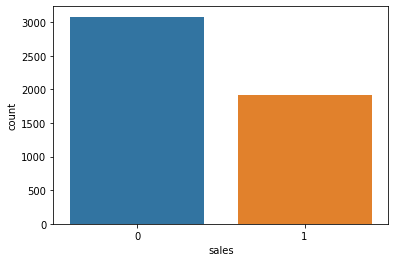

In [5]:
sns.countplot(train_data['sales'])

#### Effect of Promotion on Sales
Question - Does the special in-store promotion have an effect on the purchase decision?
* Ho: In-store promotion and purchase decision (sales) are Independent
* H1: In-store promotion and purchase decision (sales) are Dependent

Solution - The p-value is not less than 0.05 hence, we fail to reject the null hypothesis (Ho) at a 95% level of confidence. That means that In-store promotion and Purchase descision (sales) are Independent.

Reference - http://sites.utexas.edu/sos/guided/inferential/categorical/chi2/#:~:text=This%20test%20is%20used%20to,probability%20distribution%20of%20the%20other.

In [6]:
missing_instore_promo = train_data.copy()

replace_dict = {1: "True", np.nan: "NA"}
in_store_promo = missing_instore_promo.replace({"in_store_promotions": replace_dict})

contigency_df = pd.crosstab(in_store_promo['sales'], in_store_promo['in_store_promotions'], )
c, p, dof, expected = chi2_contingency(contigency_df)
print("p_value: ",round(p,3))

p_value:  0.211


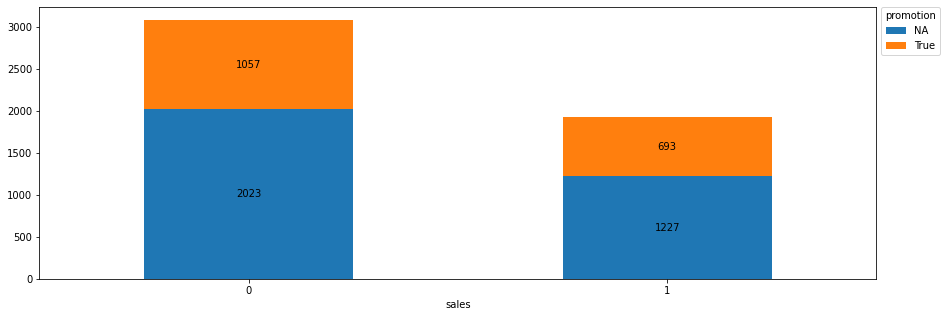

In [7]:
plt.rcParams["figure.figsize"] = (15,5)
ax = contigency_df.plot(kind='bar', stacked=True, rot=0)
ax.legend(title='promotion', bbox_to_anchor=(1, 1.02), loc='upper left')

for c in ax.containers:
    ax.bar_label(c, label_type='center')

#### Share of Store visitors across regions


<AxesSubplot:xlabel='store_region', ylabel='store_visitors'>

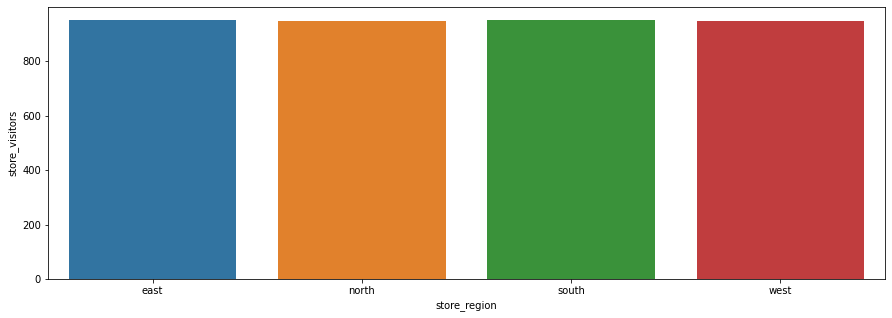

In [8]:
gby_store_region = train_data.groupby('store_region', as_index=False)['store_visitors'].mean().round()
sns.barplot(x='store_region', y='store_visitors', data=gby_store_region,
                 order=list(gby_store_region['store_region']))

#### Effect of Discount on Sales

c:\Users\Shrikanth Singh\Desktop\Next Opportunity\GFK\Submission_Gfk_MLE\notebook\utils_notebook.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


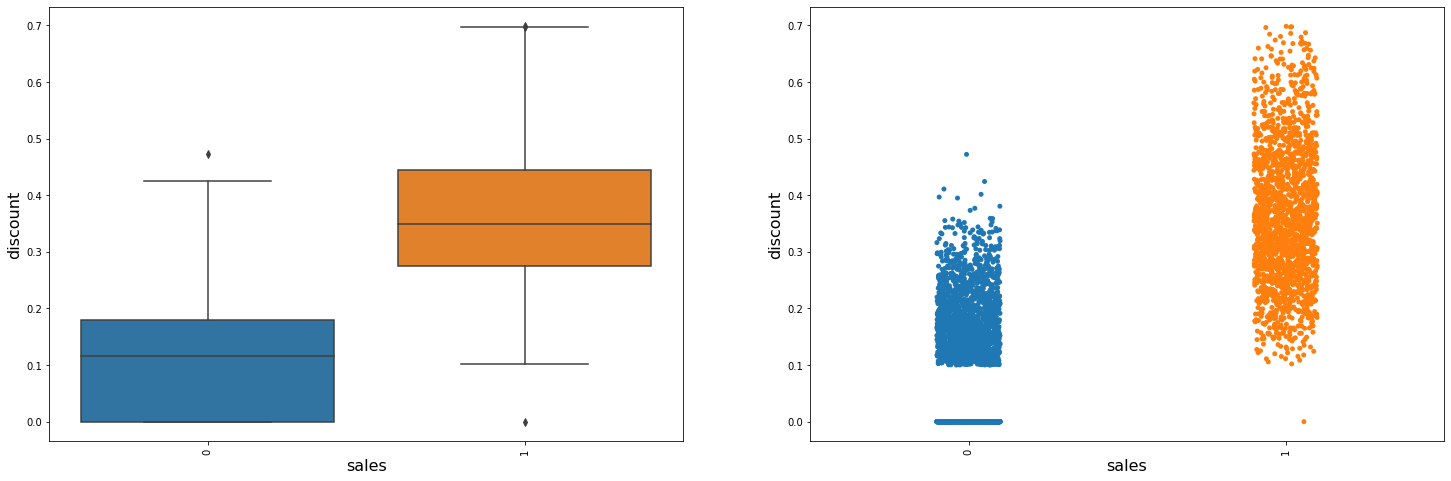

In [9]:
discount_sales_df = train_data[['discount', 'sales']].copy()
discount_sales_df = discount_sales_df.dropna()
utils_notebook.make_discrete_plot(discount_sales_df, 'sales', 'discount')

In [10]:
discount_sales_df['index_col'] = range(1, len(discount_sales_df) + 1)
discount_sales_df = discount_sales_df.pivot_table(index='index_col', columns='sales',
                              values='discount').add_prefix('sales_').reset_index().fillna(0.0)

#### Shapiro-Wilk - Test of normality
* Ho: The discount values for sales subgroup follows normal distribution
* H1: The discount values for sales subgroup follows non-normal distribution
  
Since the p-value is less than .05, we reject the null hypothesis. The sample data does not come from a normal distribution.

In [11]:
w_0, pvalue_0 = stats.shapiro(discount_sales_df['sales_0'])
w_1, pvalue_1 = stats.shapiro(discount_sales_df['sales_1'])
print(f'Sales=0: p_value={pvalue_0} and test_statistic={w_0}')
print(f'Sales=1: p_value={pvalue_1} and test_statistic={w_1}')

Sales=0: p_value=0.0 and test_statistic=0.7045962810516357
Sales=1: p_value=0.0 and test_statistic=0.728972852230072


#### Wilcoxon-Mann-Whitney test
As the distribution between sales and discount follows non-normal distribution we have to perform nonparametric version of Independent t-test (i.e Wilcoxon-Mann-Whitney test).
* Ho: The discount distribution is same in the sales subgroups.
* H1: The discount distribution is different in the sales subgroups.

In [12]:
stat, p = stats.mannwhitneyu(x=discount_sales_df['sales_0'], 
                             y=discount_sales_df['sales_1'], alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Same distribution - fail to reject H0')
else:
	print('Different distribution - reject Ho')

Statistics=10375116.000, p=0.000
Different distribution - reject Ho


#### Visualization of Sales vs Discounted bins - Proves our hypothesis above
* Intutively we can observe that the purchase decision (sales) is the least when the discounts are minimum. 
* Surprisingly the sales is less on the highest discounted products compared to nominal discounted items.
* This shows customers decision cannot be influenced by discounts as they pay attention to other significant factors.

<AxesSubplot:xlabel='discount_bins', ylabel='sales'>

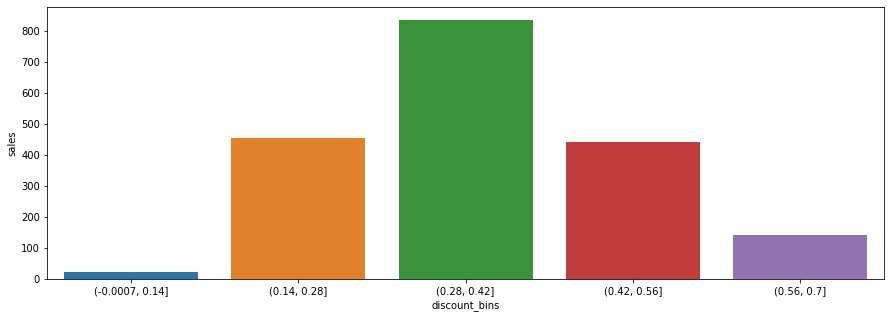

In [13]:
discount_sales_df = train_data[['discount', 'sales']].copy()
discount_sales_df = discount_sales_df.dropna().round(2)
discount_sales_df['discount_bins'] = pd.cut(discount_sales_df['discount'], bins=5)
discount_sales_df.drop(columns='discount', inplace=True)
discount_sales_df['discount_bins'] = discount_sales_df['discount_bins'].astype(str)

grouped_discount_sales = discount_sales_df.groupby('discount_bins', 
                                          as_index=False)['sales'].sum()

sns.barplot(data=grouped_discount_sales, x='discount_bins', y='sales')

#### Bias of Discount on Gender
Result: No significant difference in purchase behaviour of different gender given the discount on products.

<AxesSubplot:xlabel='discount_bins', ylabel='sales'>

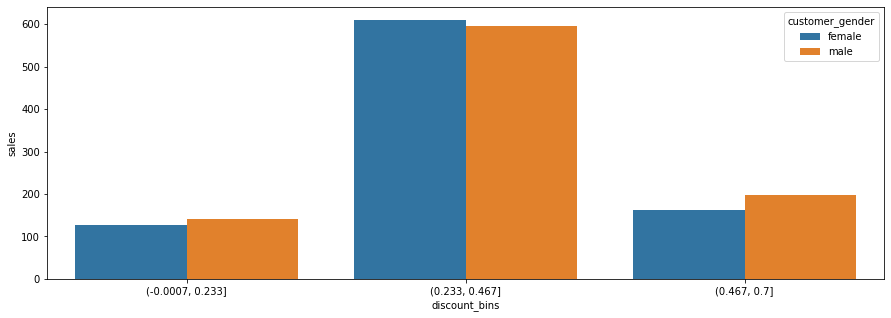

In [14]:
discount_gender_df = train_data[['discount', 'customer_gender', 'sales']].copy()
discount_gender_df = discount_gender_df.dropna().round(2)
discount_gender_df['discount_bins'] = pd.cut(discount_gender_df['discount'], bins=3)
discount_gender_df.drop(columns='discount', inplace=True)
discount_gender_df['discount_bins'] = discount_gender_df['discount_bins'].astype(str)

grouped_gender_sales = discount_gender_df.groupby(['customer_gender', 'discount_bins'], 
                                          as_index=False)['sales'].sum()

sns.barplot(x='discount_bins', y='sales', hue='customer_gender', data=grouped_gender_sales)

#### Relation between Staff experience and Store visitors
Result: Staff experience does not have staggering influence on the number of visitors to the store except the last subgroup of highly experienced staffs between 27 to 34 years

c:\Users\Shrikanth Singh\Desktop\Next Opportunity\GFK\Submission_Gfk_MLE\notebook\utils_notebook.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


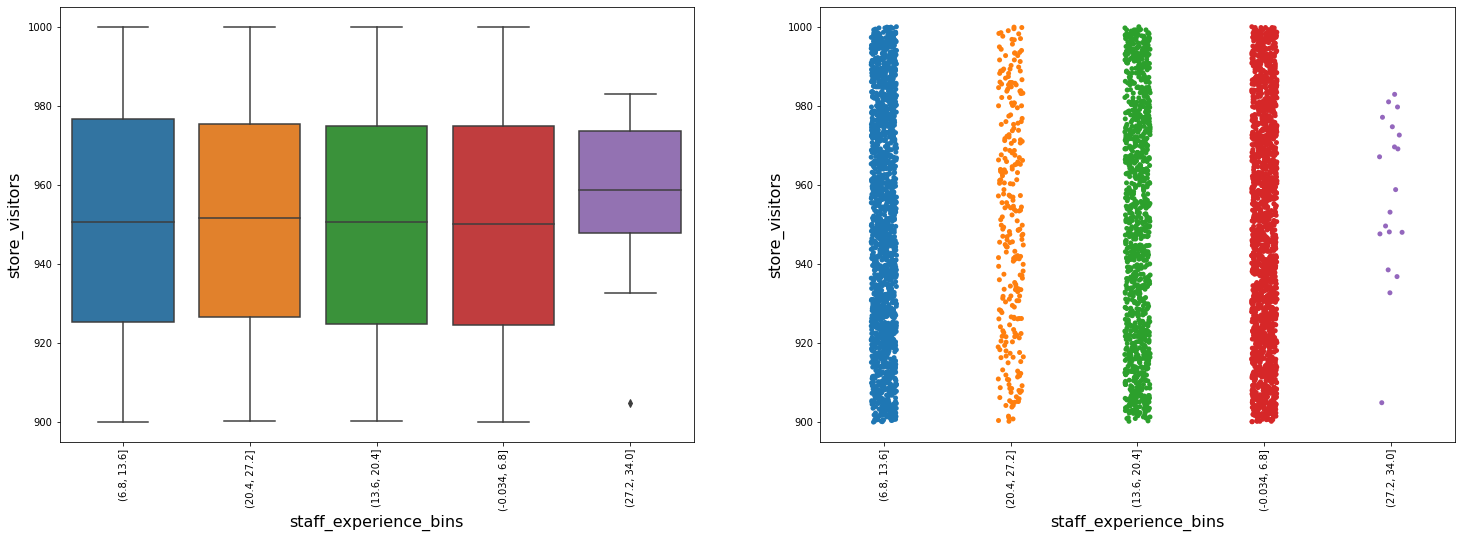

In [15]:
staff_exp_store_visitors_df = train_data[['staff_experience', 'store_visitors']].copy()
staff_exp_store_visitors_df = staff_exp_store_visitors_df.round(1)
staff_exp_store_visitors_df['staff_experience_bins'] = pd.cut(staff_exp_store_visitors_df['staff_experience'], bins=5)
staff_exp_store_visitors_df.drop(columns='staff_experience', inplace=True)
staff_exp_store_visitors_df['staff_experience_bins'] = staff_exp_store_visitors_df['staff_experience_bins'].astype(str)
utils_notebook.make_discrete_plot(staff_exp_store_visitors_df, 'staff_experience_bins', 'store_visitors')

#### Relation between Customer age - Store region and Customer age - Gender

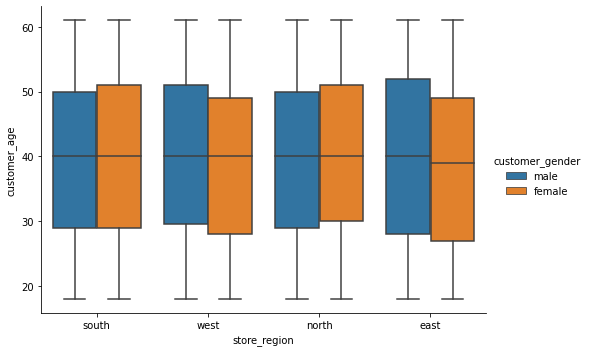

In [16]:
age_region_gender = train_data[['customer_age', 'customer_gender', 'store_region']].copy()
age_region_gender = age_region_gender.dropna()

sns.catplot(x="store_region", y="customer_age", hue="customer_gender", kind="box", 
            data=age_region_gender, aspect=14/10)

#### Relation between Discount and Store region

c:\Users\Shrikanth Singh\Desktop\Next Opportunity\GFK\Submission_Gfk_MLE\notebook\utils_notebook.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


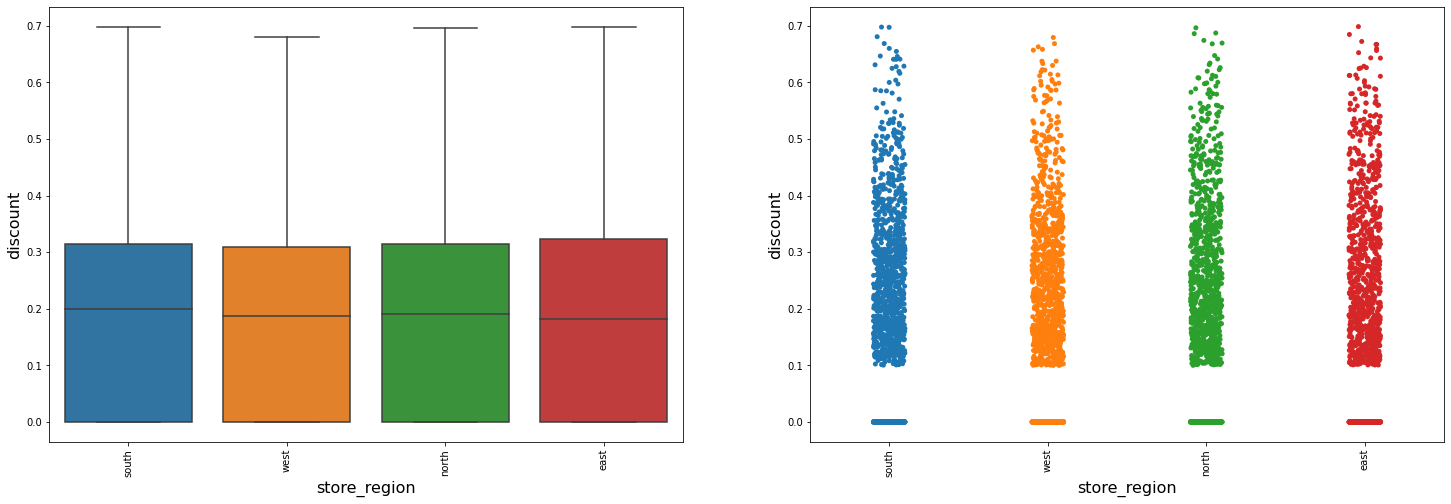

In [17]:
utils_notebook.make_discrete_plot(train_data, 'store_region', 'discount')

## Imputation and Feature Selection

#### Checking Imputation Possibility - Using Maximal Information Coefficient
* We can check if the column with highest missing value entries (in_store_promotions) can be imputed using other columns (store_region, store_open, store_visitors, customer_age, price).

* Result - None of columns show significant MIC score and hence the column in_store_promotions cannot be imputed using KNN imputer.
  
* Because 65% of the values in the column in_store_promotions are missing and as it cannot be imputed we will drop this feature from the dataset.

In [18]:
feature_corr_check = train_data[['store_region', 'store_open', 'store_visitors', 
                                 'customer_age', 'price', 'in_store_promotions']].copy()

feature_corr_check[['store_region', 'store_open', 'in_store_promotions']] = \
                  feature_corr_check[['store_region', 'store_open', 'in_store_promotions']].apply(preprocessing.LabelEncoder().fit_transform)
                  
feature_corr_df = feature_corr_check.corr(method=utils_notebook.compute_mic)
feature_corr_df.style.background_gradient(cmap='coolwarm')

,store_region,store_open,store_visitors,customer_age,price,in_store_promotions
store_region,1.000000,0.000000,0.078329,0.009969,0.078212,0.000177
store_open,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
store_visitors,0.078329,0.000000,1.000000,0.079989,0.080101,0.075050
customer_age,0.009969,0.000000,0.079989,1.000000,0.075032,0.007739
price,0.078212,0.000000,0.080101,0.075032,1.000000,0.074659
in_store_promotions,0.000177,0.000000,0.075050,0.007739,0.074659,1.000000


#### Relation between price and rrp_price
As we see rrp_price and price are identical columns we will drop rrp_price from the datasets

In [19]:
factor_value = train_data['rrp_price'] / train_data['price']
factor_value.unique()

array([100., 100., 100.])